## Exploratory Analysis

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

There are 4 csv files in the current version of the dataset:

In [4]:
for dirname, _, filenames in os.walk('./Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Dataset\user_a.csv
./Dataset\user_b.csv
./Dataset\user_c.csv
./Dataset\user_d.csv


In [5]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        print(nGraphRow, nGraphPerRow)
        plt.subplot(int(nGraphRow), nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [91]:
# Correlation matrix
def plotCorrelationMatrix(df):
    x = df1.iloc[:, 1:]
    # output
    y = df1.iloc[:, 0]

    fig, axs = plt.subplots(56, 2, figsize=(18,70))

    col_names = df.columns[1:]
    for i in range(0,56):
        for j in range(0,2):
            axs[i, j].scatter(x.iloc[:,i*2+j],y, s=1)
            axs[i, j].set_xlabel(col_names[i*2+j])
            axs[i, j].set_ylim([0,3])

    for ax in axs.flat:
        ax.set( ylabel='Class')

    fig.tight_layout()




In [7]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

### USER A

In [8]:
df1 = pd.read_csv('./Dataset/user_a.csv', delimiter=',')
df1.dataframeName = 'dataset.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2880 rows and 113 columns


In [30]:
df1.head(5)

Class  AF3 delta std  AF3 delta m  AF3 theta std  AF3 theta m  \
0    1.0    3569.164550  2063.892754       1.673726     4.444736   
1    1.0    3568.423670  2063.099248       1.897790     3.728823   
2    1.0    3568.157929  2062.445859       2.798014     2.574504   
3    1.0    3567.710021  2062.112673       2.181775     3.610507   
4    1.0    3565.546124  2063.128867       1.685161     3.384311   

   AF3 alpha std  AF3 alpha m  AF3 beta std  AF3 beta m  F7 delta std  ...  \
0       0.526209     3.002088      1.425022    3.302739   3563.803888  ...   
1       1.304186     1.854353      1.366575    2.546458   3563.560922  ...   
2       1.120537     1.958819      0.982433    2.258622   3563.279981  ...   
3       0.629608     2.155876      0.856275    2.233711   3562.787801  ...   
4       0.677526     1.795798      0.927924    1.909810   3562.655091  ...   

   F8 beta std  F8 beta m  AF4 delta std  AF4 delta m  AF4 theta std  \
0    45.468326  72.508750    3701.186330  2182.676835      18.192418   
1    36.551948  66.931186    3725.210509  2180.197439       8.820788   
2    40.754308  66.816547    3724.417296  2176.823208      18.159202   
3    38.074628  63.915386    3725.822160  2177.089059      19.737616   
4    35.357384  64.534645    3723.053978  2167.798335       8.429414   

   AF4 theta m  AF4 alpha std  AF4 alpha m  AF4 beta std  AF4 beta m  
0    41.349662      16.004756    42.046467     46.280843   73.565719  
1    38.012788      19.601233    29.431054     38.559351   67.470041  
2    23.612639      14.378291    19.555084     43.210004   67.781924  
3    29.484396      15.793034    25.713513     39.250246   65.031031  
4    26.374975      14.920736    35.675266     33.901687   66.956313  

[5 rows x 113 columns]

In [32]:
df1['Class'].value_counts()


1.0    960
2.0    960
0.0    960
Name: Class, dtype: int64

Distribution graphs (histogram/bar graph) of sampled columns:

Correlation matrix:

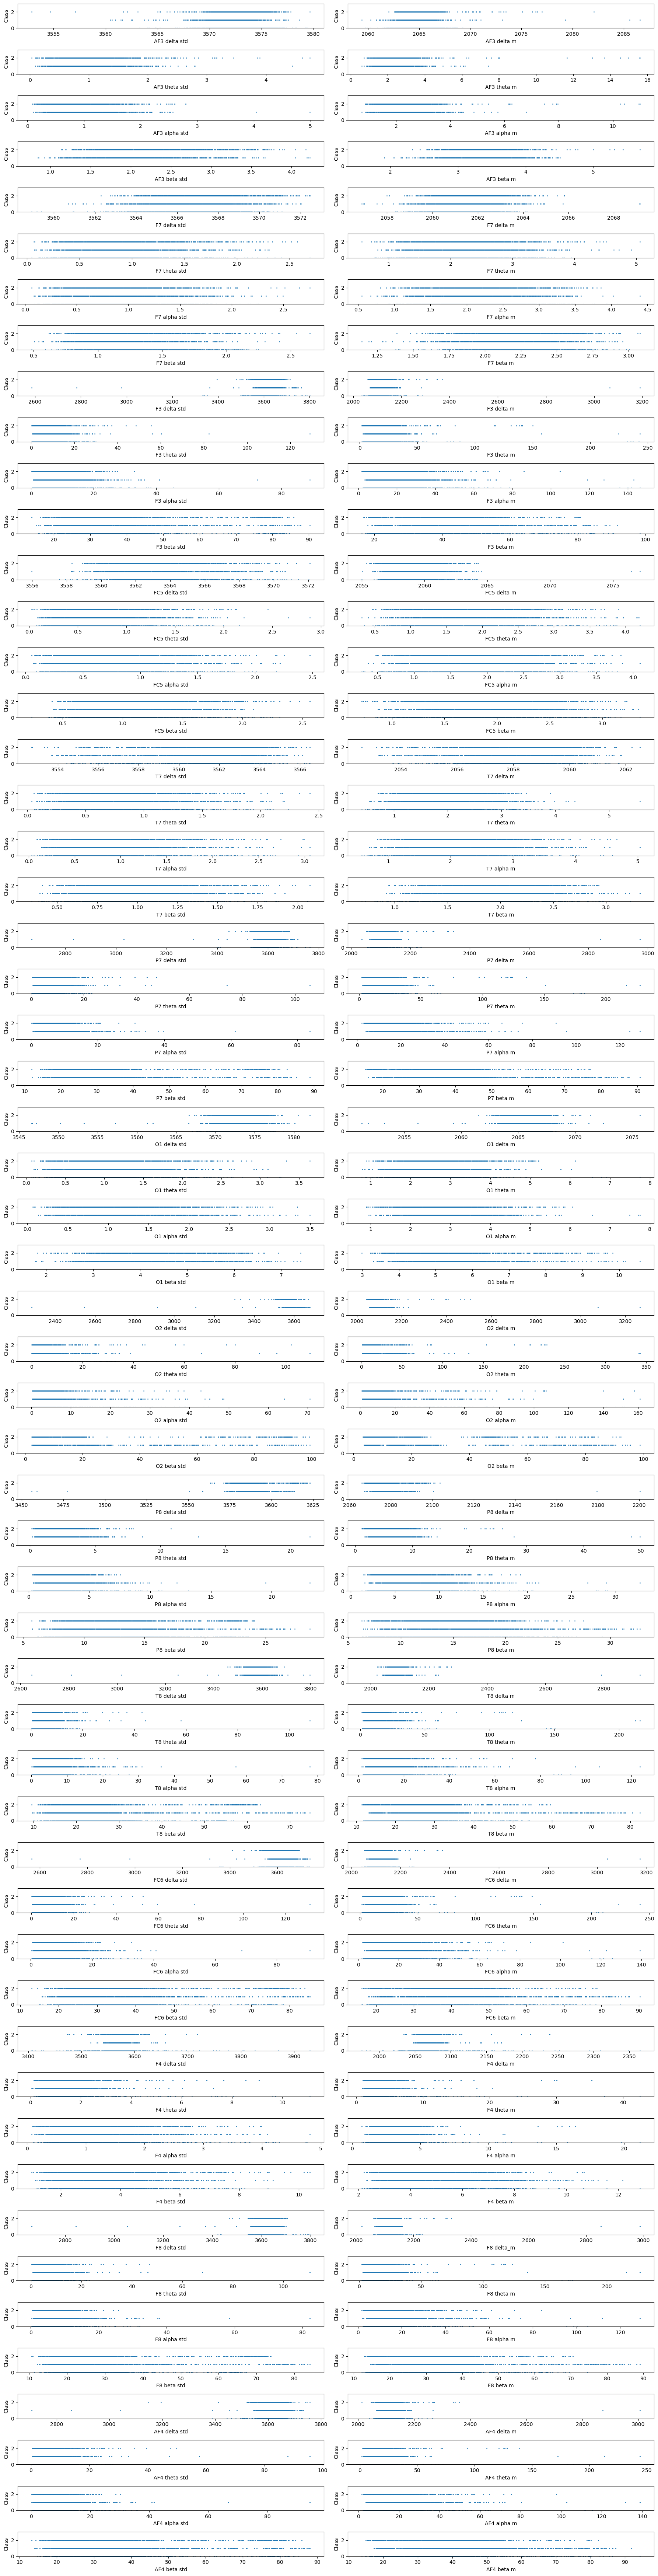

In [92]:
plotCorrelationMatrix(df1)

In [12]:
x = df1.iloc[:, 1:].values

# output
y = df1.iloc[:, 0].values

print("X: ", x)

print("y: ", y)

X:  [[3.56916455e+03 2.06389275e+03 1.67372591e+00 ... 4.20464673e+01
  4.62808430e+01 7.35657188e+01]
 [3.56842367e+03 2.06309925e+03 1.89778986e+00 ... 2.94310541e+01
  3.85593511e+01 6.74700406e+01]
 [3.56815793e+03 2.06244586e+03 2.79801408e+00 ... 1.95550844e+01
  4.32100044e+01 6.77819236e+01]
 ...
 [3.57432620e+03 2.06603101e+03 1.41673100e+00 ... 6.35511678e+00
  3.22380625e+01 1.90238973e+01]
 [3.57373579e+03 2.06594533e+03 1.11994251e+00 ... 1.46636808e+01
  2.41095095e+01 2.64682539e+01]
 [3.57398293e+03 2.06596040e+03 1.01106177e+00 ... 1.29981192e+01
  2.36350519e+01 2.65811163e+01]]
y:  [1. 1. 1. ... 0. 0. 0.]


Scatter and density plots:

C:\Users\Zonayed\AppData\Local\Temp\ipykernel_18572\950191735.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


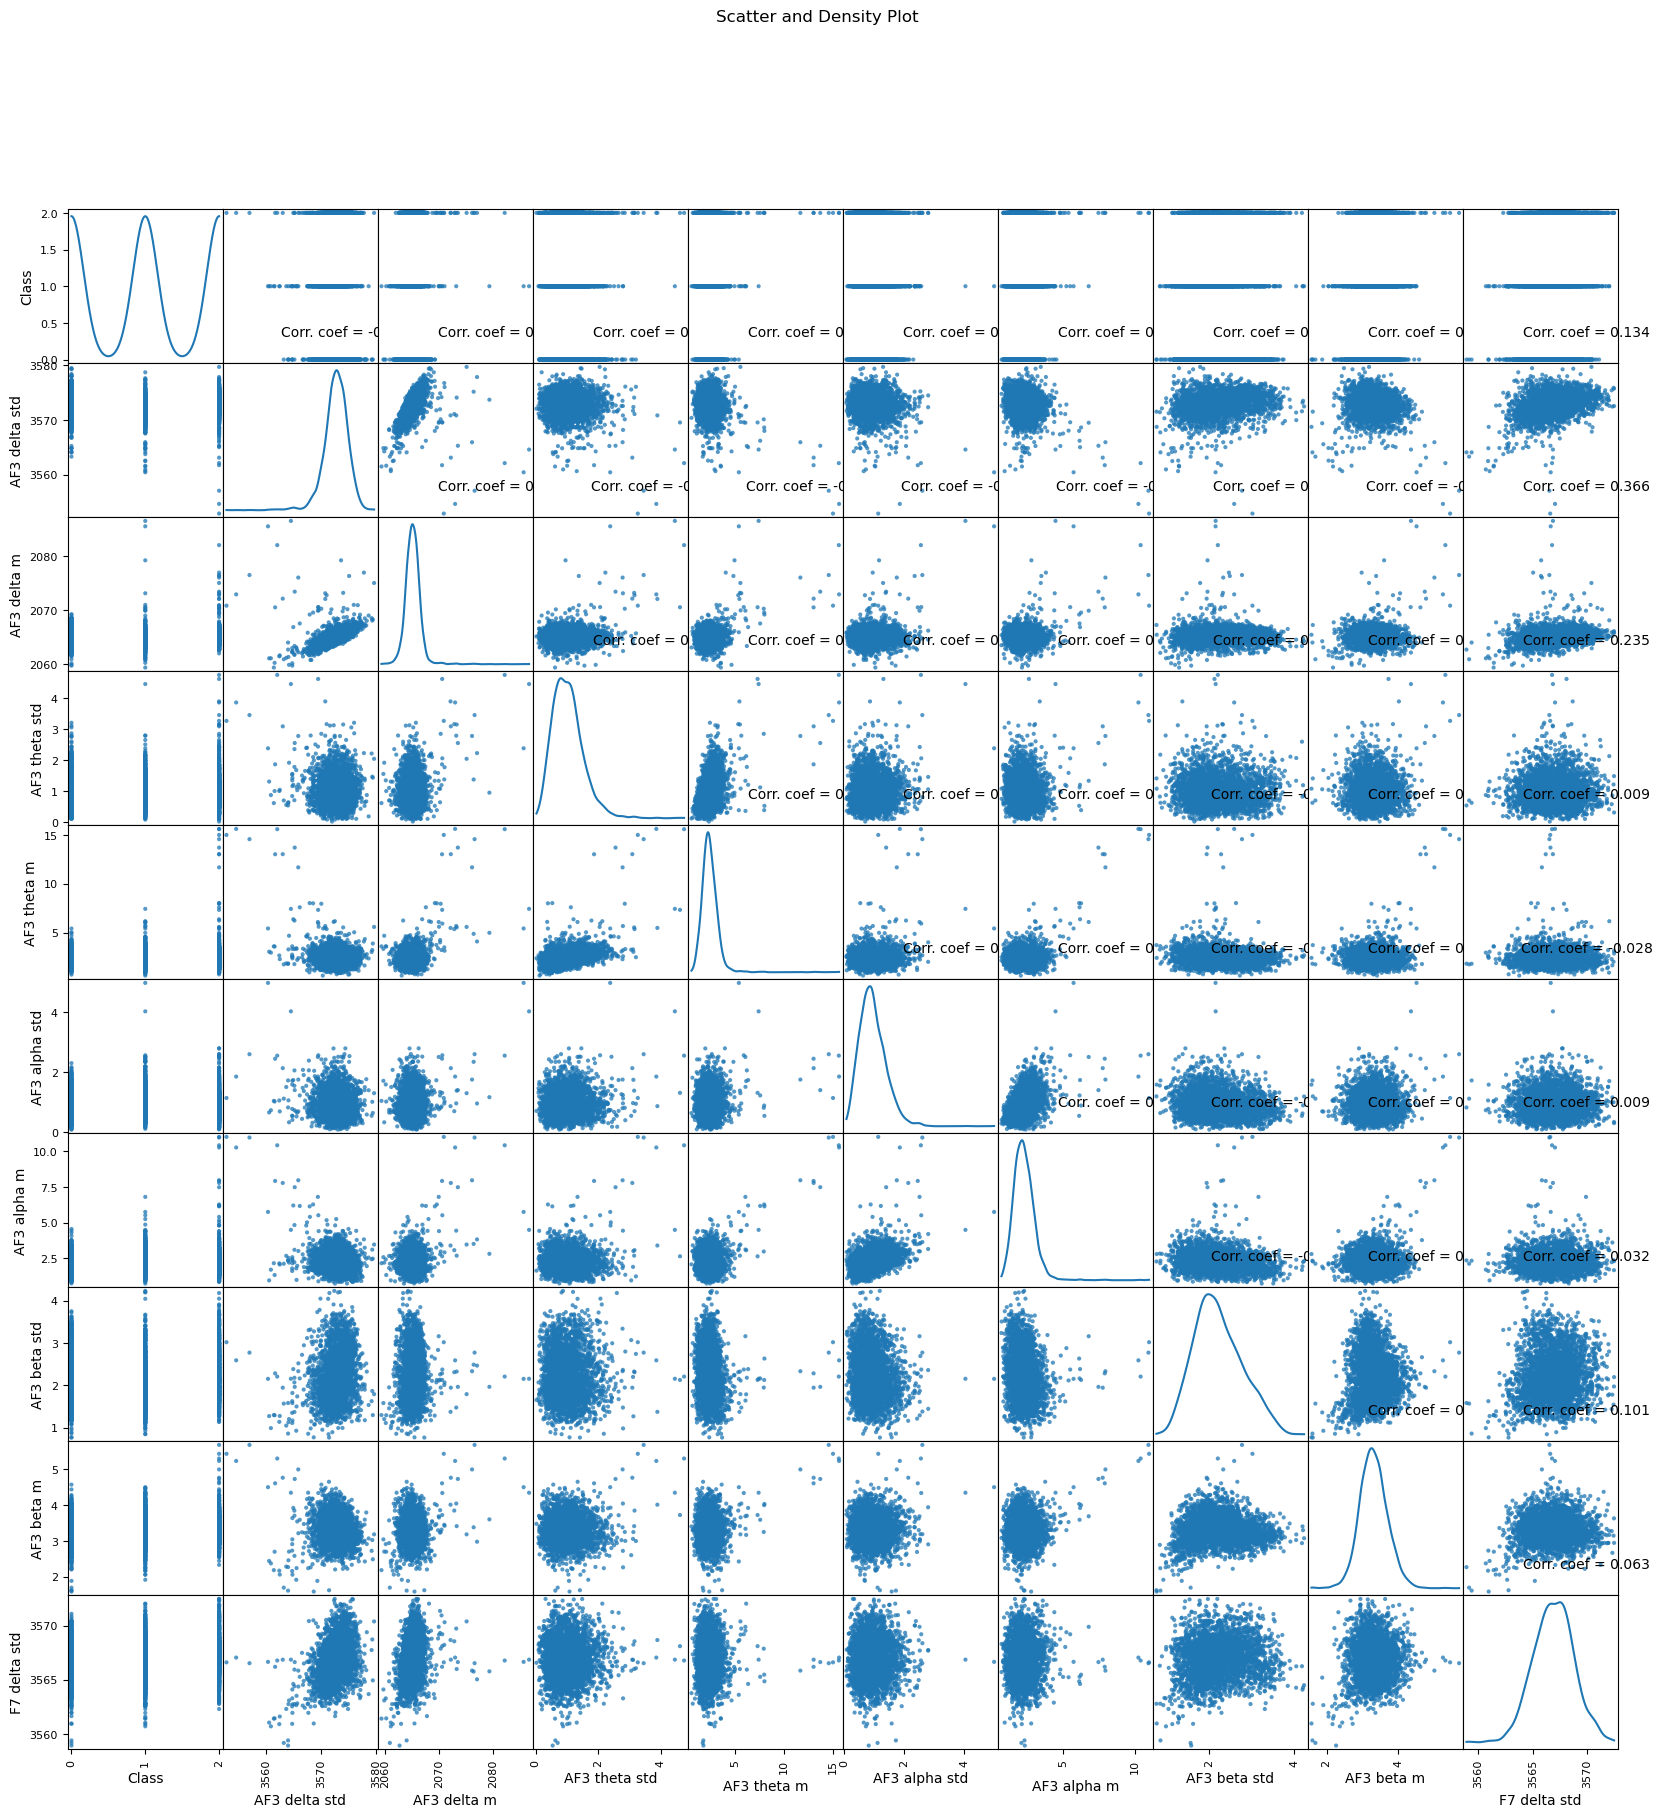

In [13]:
plotScatterMatrix(df1, 20, 10)

In [14]:
df1s = np.split(df1, [1], axis=1)

feature_names =  df1s[1].columns
target_df = df1s[0].columns
# print(feature_names.shape, target_df.shape)
# print(feature_names, target_df)
df1[feature_names].corrwith(df1[target_df], axis=0).sort_values(ascending=False)


AF3 alpha m     NaN
AF3 alpha std   NaN
AF3 beta m      NaN
AF3 beta std    NaN
AF3 delta m     NaN
                 ..
T8 beta std     NaN
T8 delta m      NaN
T8 delta std    NaN
T8 theta m      NaN
T8 theta std    NaN
Length: 113, dtype: float64

### User B

In [15]:
df2 = pd.read_csv('./Dataset/user_b.csv', delimiter=',')
df2.dataframeName = 'dataset.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2880 rows and 113 columns


In [16]:
df2.head(5)

Class  AF3 delta std  AF3 delta m  AF3 theta std  AF3 theta m  \
0    2.0    3577.872723  2067.408557       1.025738     1.744496   
1    2.0    3577.830179  2066.857321       0.573598     1.711991   
2    2.0    3576.706494  2066.736837       0.525896     1.584096   
3    2.0    3577.453273  2066.839712       0.549982     1.322669   
4    2.0    3577.145874  2066.495108       0.253211     1.169839   

   AF3 alpha std  AF3 alpha m  AF3 beta std  AF3 beta m  F7 delta std  ...  \
0       0.883469     1.282893      3.039058    2.730998   3568.553050  ...   
1       1.012575     1.900513      2.746218    3.066821   3569.060181  ...   
2       0.201467     1.038686      2.685631    2.977552   3569.214969  ...   
3       0.373559     1.043046      2.547650    2.906844   3568.109499  ...   
4       0.256740     1.169276      2.680609    2.864313   3568.736123  ...   

   F8 beta std  F8 beta m  AF4 delta std  AF4 delta m  AF4 theta std  \
0     1.489550   2.038554    3574.021851  2064.935214       1.025629   
1     1.707576   2.184310    3574.324753  2065.035528       0.677875   
2     1.553983   2.112580    3574.523186  2064.691860       0.605963   
3     1.777661   2.219161    3574.218300  2064.862052       0.712377   
4     2.108666   2.162283    3574.278866  2065.125094       0.166225   

   AF4 theta m  AF4 alpha std  AF4 alpha m  AF4 beta std  AF4 beta m  
0     2.865736       0.427347     1.619304      2.067162    2.244023  
1     2.216925       0.617394     1.926881      1.933766    2.339523  
2     2.000947       0.354295     1.633133      2.017921    2.507417  
3     1.407308       0.731966     1.088495      2.112044    2.416092  
4     1.150858       0.540831     1.736812      1.869272    2.461744  

[5 rows x 113 columns]

1.0 5


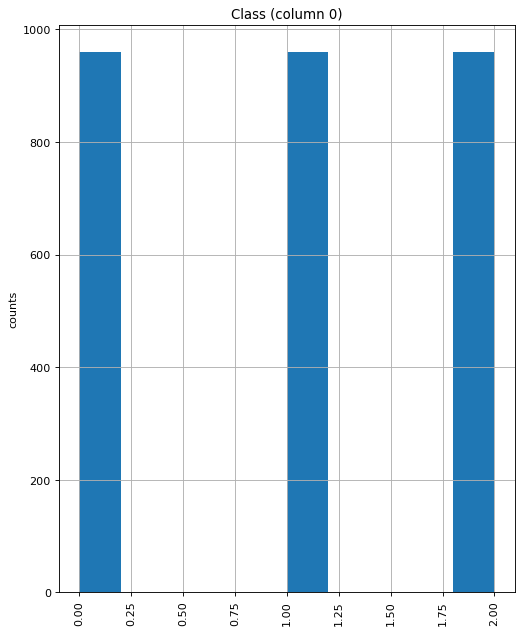

In [17]:
plotPerColumnDistribution(df2, 10, 5)

C:\Users\Zonayed\AppData\Local\Temp\ipykernel_18572\128494285.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


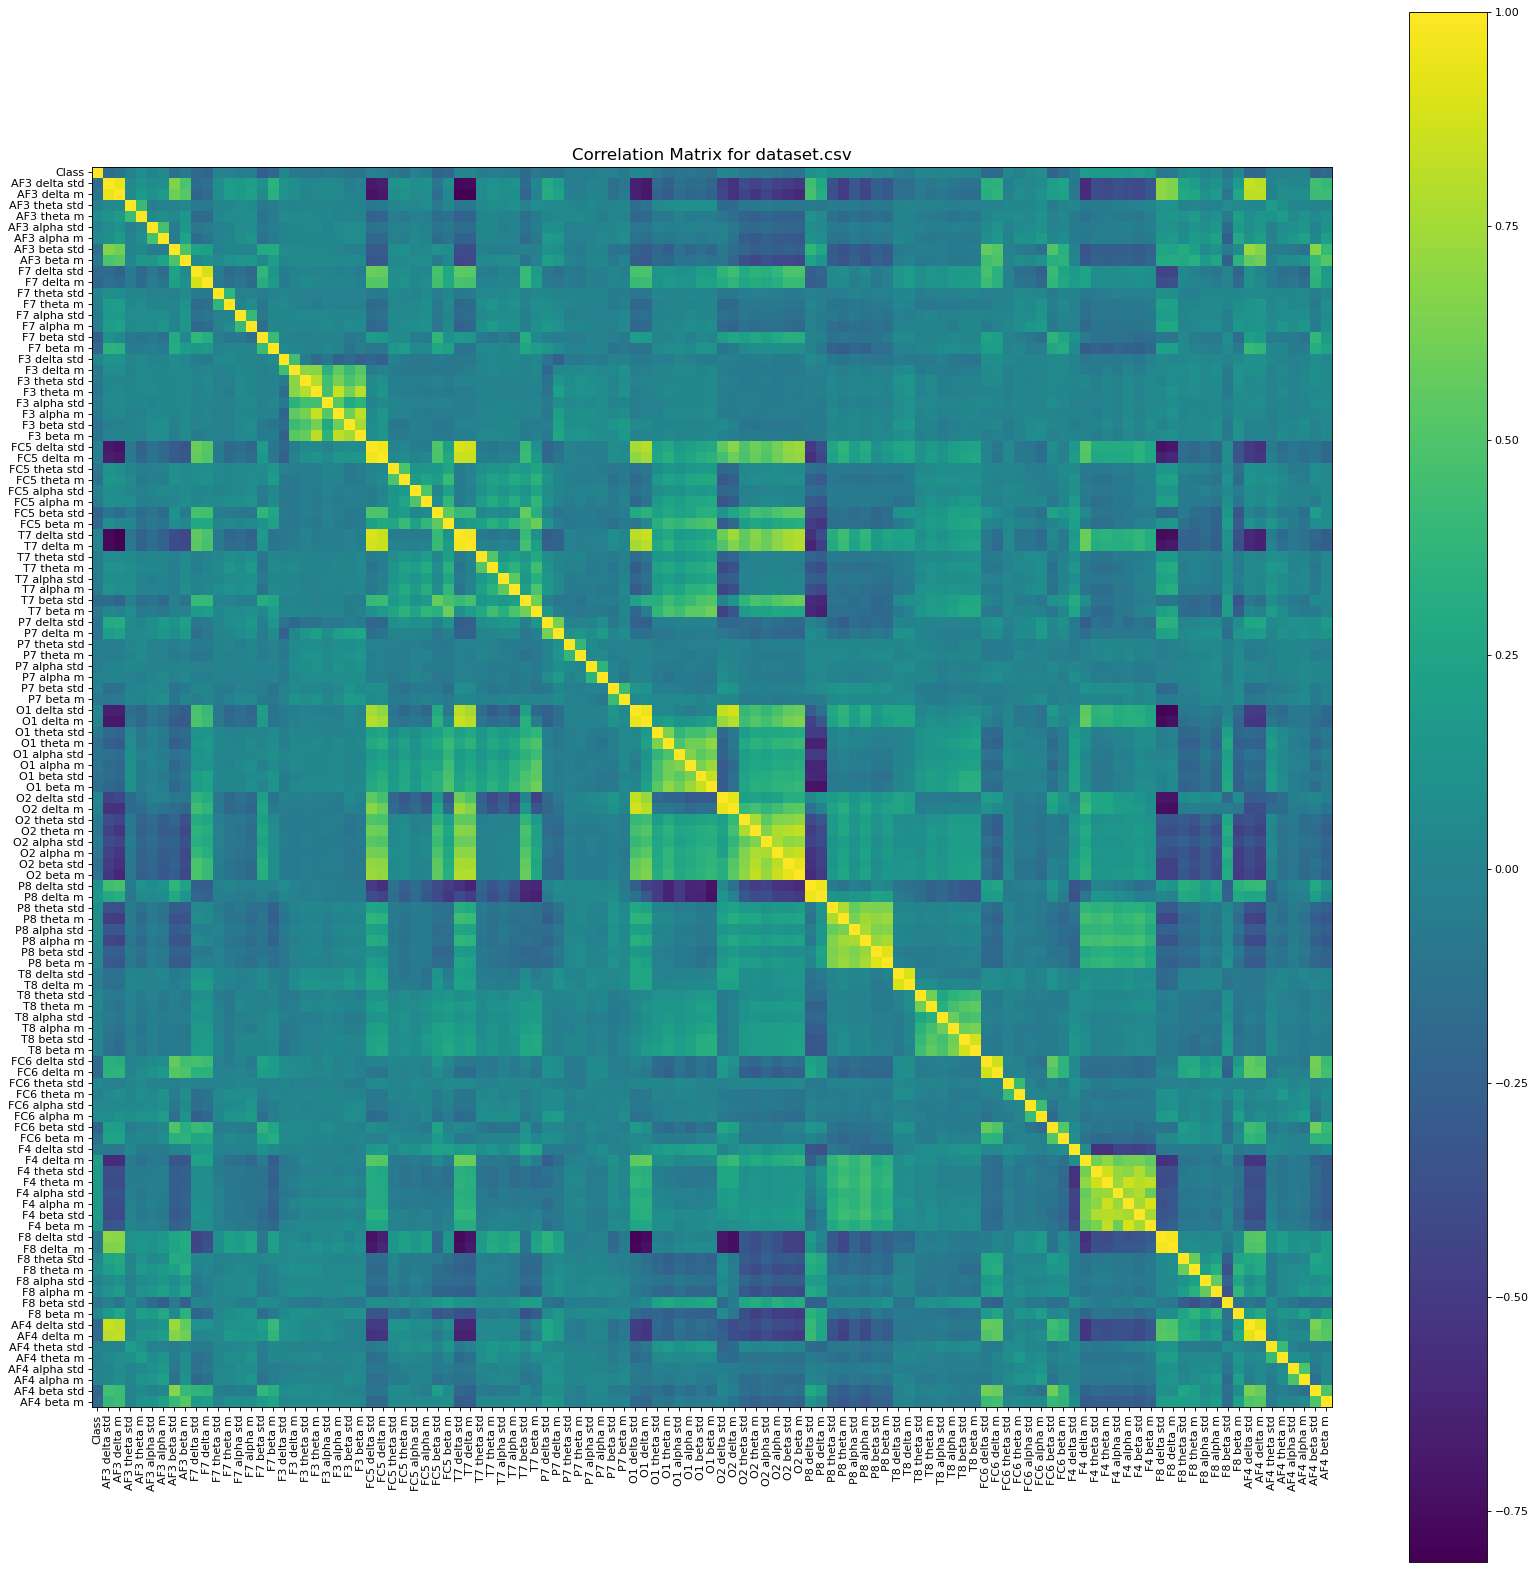

In [18]:
plotCorrelationMatrix(df2, 25)

C:\Users\Zonayed\AppData\Local\Temp\ipykernel_18572\950191735.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


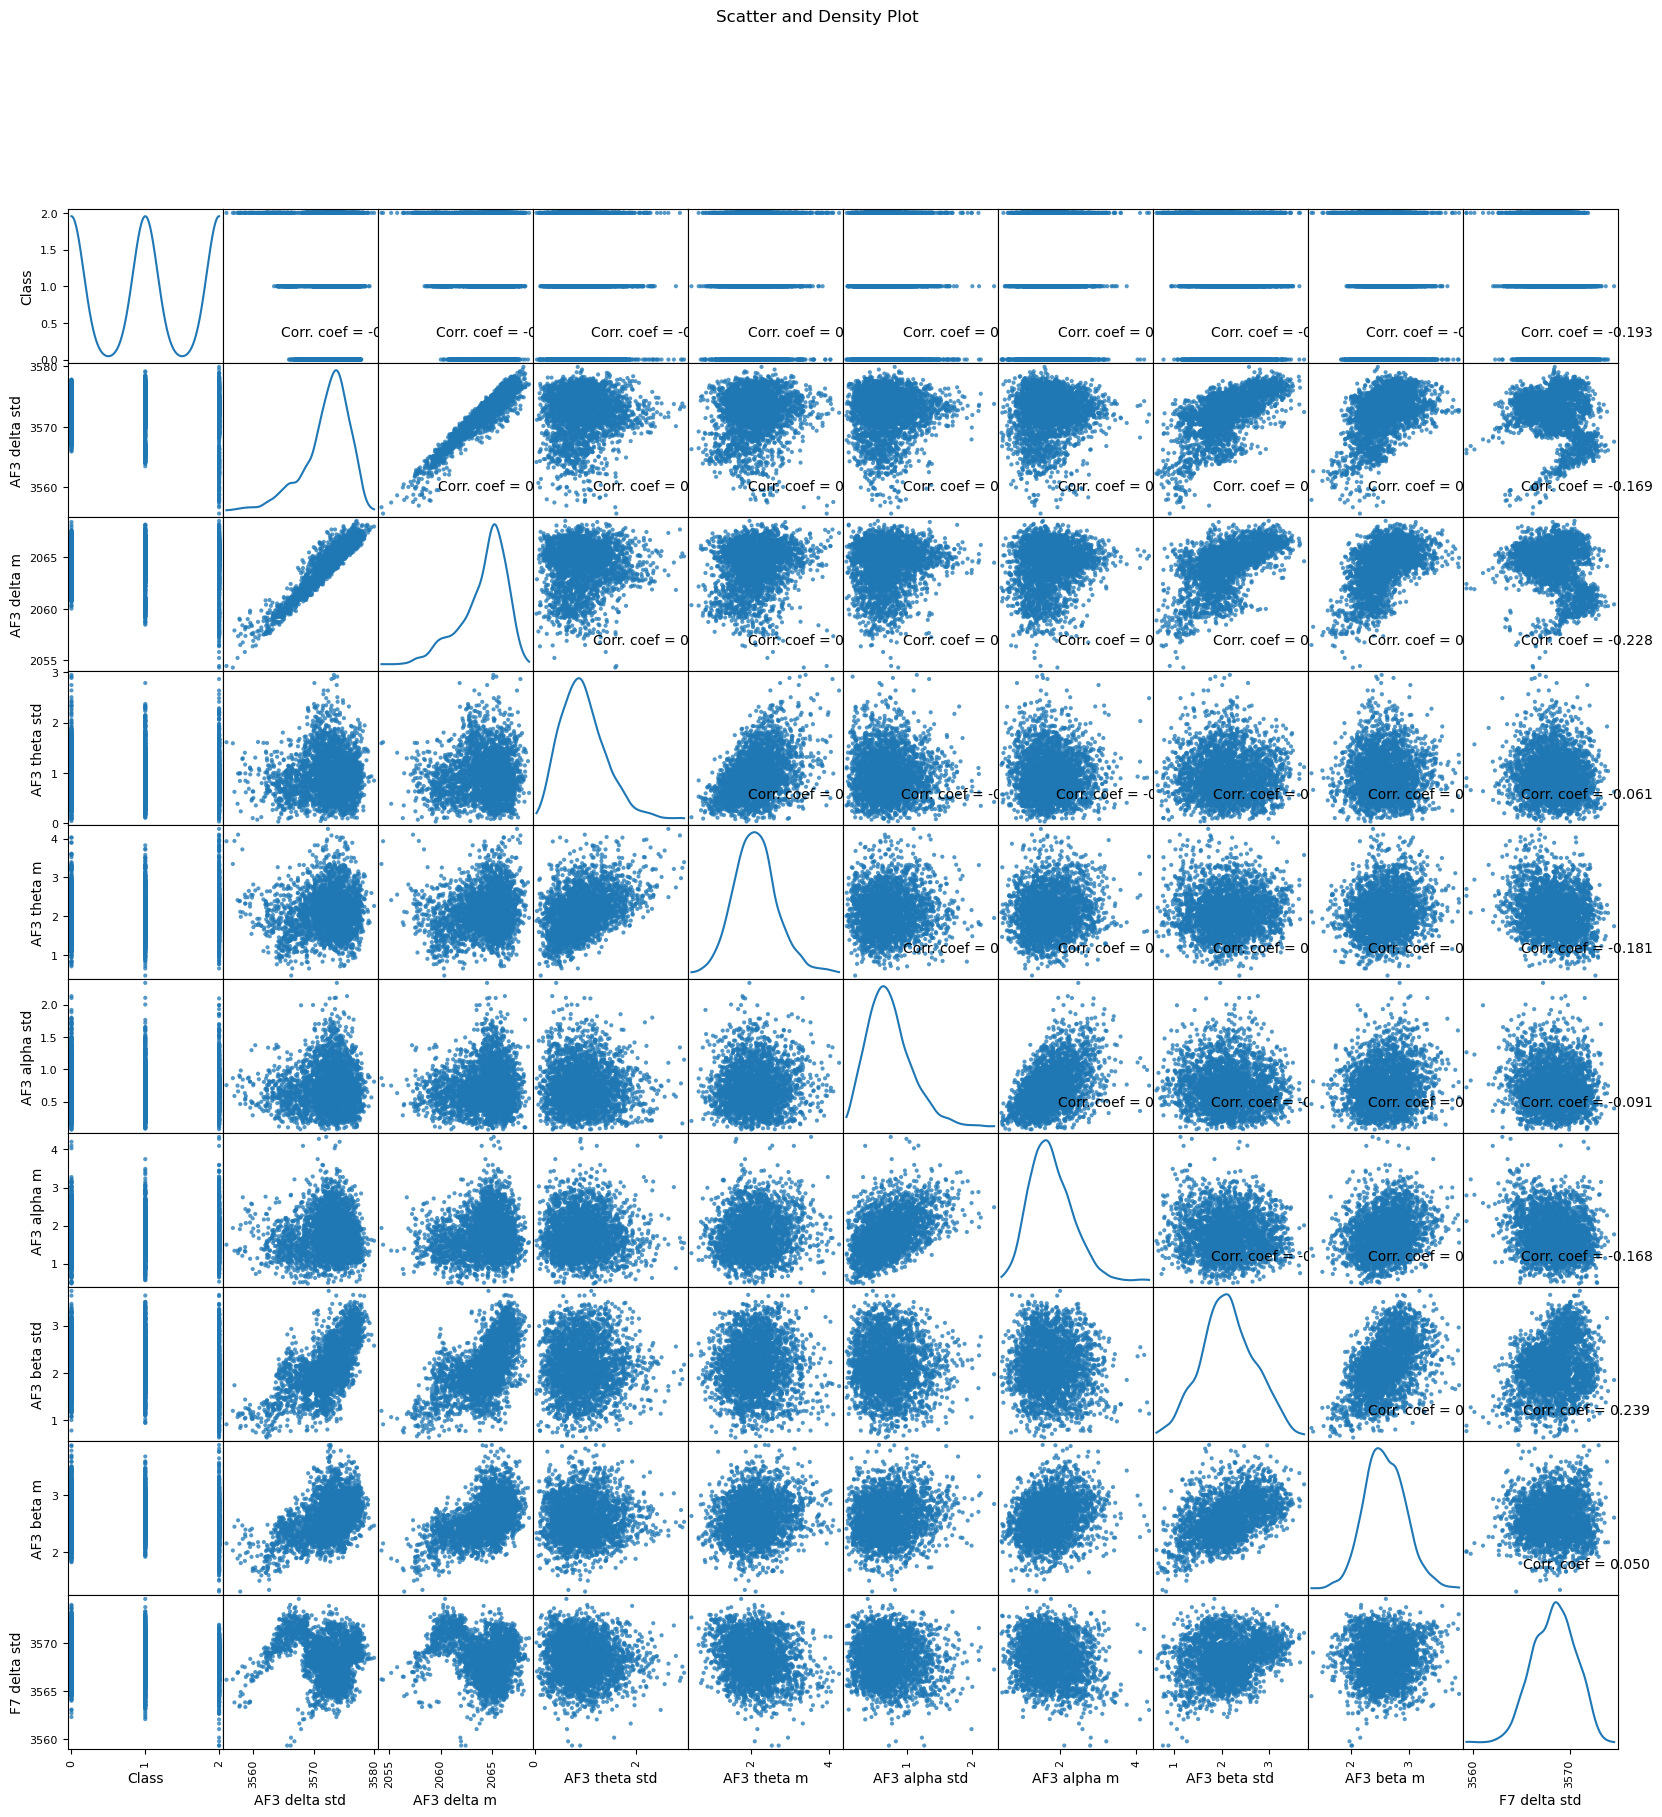

In [19]:
plotScatterMatrix(df2, 20, 10)

### User C

In [20]:
df3 = pd.read_csv('./Dataset/user_c.csv', delimiter=',')
df3.dataframeName = 'dataset.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2880 rows and 113 columns


In [21]:
df3.head(5)

Class  AF3 delta std  AF3 delta m  AF3 theta std  AF3 theta m  \
0    1.0    3573.336166  2067.827798       1.334973     2.294574   
1    1.0    3569.424197  2063.871329       1.639684     2.573080   
2    1.0    3570.767652  2064.654687       0.706498     2.613442   
3    1.0    3569.156909  2065.357831       0.940101     2.563546   
4    1.0    3567.536119  2063.997440       0.961830     2.374021   

   AF3 alpha std  AF3 alpha m  AF3 beta std  AF3 beta m  F7 delta std  ...  \
0       0.742210     2.052755      3.604952    4.854279   3575.508401  ...   
1       1.097168     2.678287      2.313650    4.727548   3573.524571  ...   
2       1.086770     2.222977      2.409857    4.936480   3573.935350  ...   
3       0.836405     2.151778      2.650254    4.500677   3572.802320  ...   
4       1.046514     1.783034      2.432391    4.626892   3571.437750  ...   

   F8 beta std  F8 beta m  AF4 delta std  AF4 delta m  AF4 theta std  \
0     3.625333   8.860455    3522.728728  2045.497490       0.750616   
1     3.918033   7.473774    3526.382257  2047.897934       0.799930   
2     4.355499   8.318612    3531.725098  2049.223458       1.411546   
3     3.683768   5.963362    3529.415919  2049.231604       1.221492   
4     3.498479   6.482901    3519.874261  2044.473685       1.797157   

   AF4 theta m  AF4 alpha std  AF4 alpha m  AF4 beta std  AF4 beta m  
0     2.170167       1.372258     2.098884      2.418585    3.885361  
1     2.408514       1.110604     2.154791      2.048773    4.238736  
2     2.642449       1.518919     1.738234      1.457515    3.860666  
3     3.438005       1.272858     2.111202      1.679218    3.506380  
4     3.386036       0.770980     3.505291      1.477401    3.687515  

[5 rows x 113 columns]

1.0 5


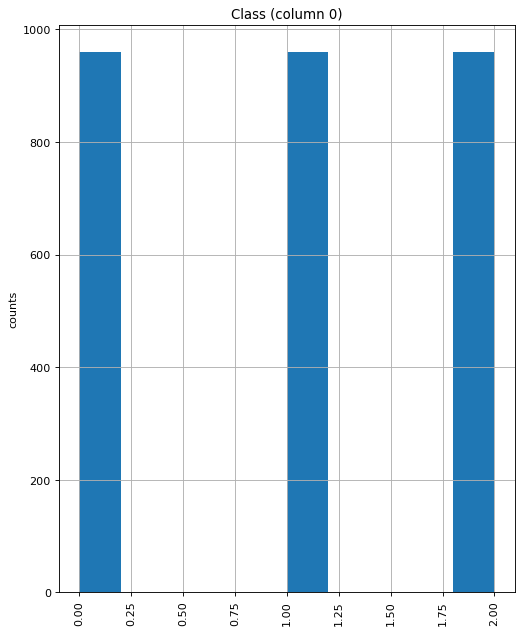

In [22]:
plotPerColumnDistribution(df3, 10, 5)

C:\Users\Zonayed\AppData\Local\Temp\ipykernel_18572\128494285.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


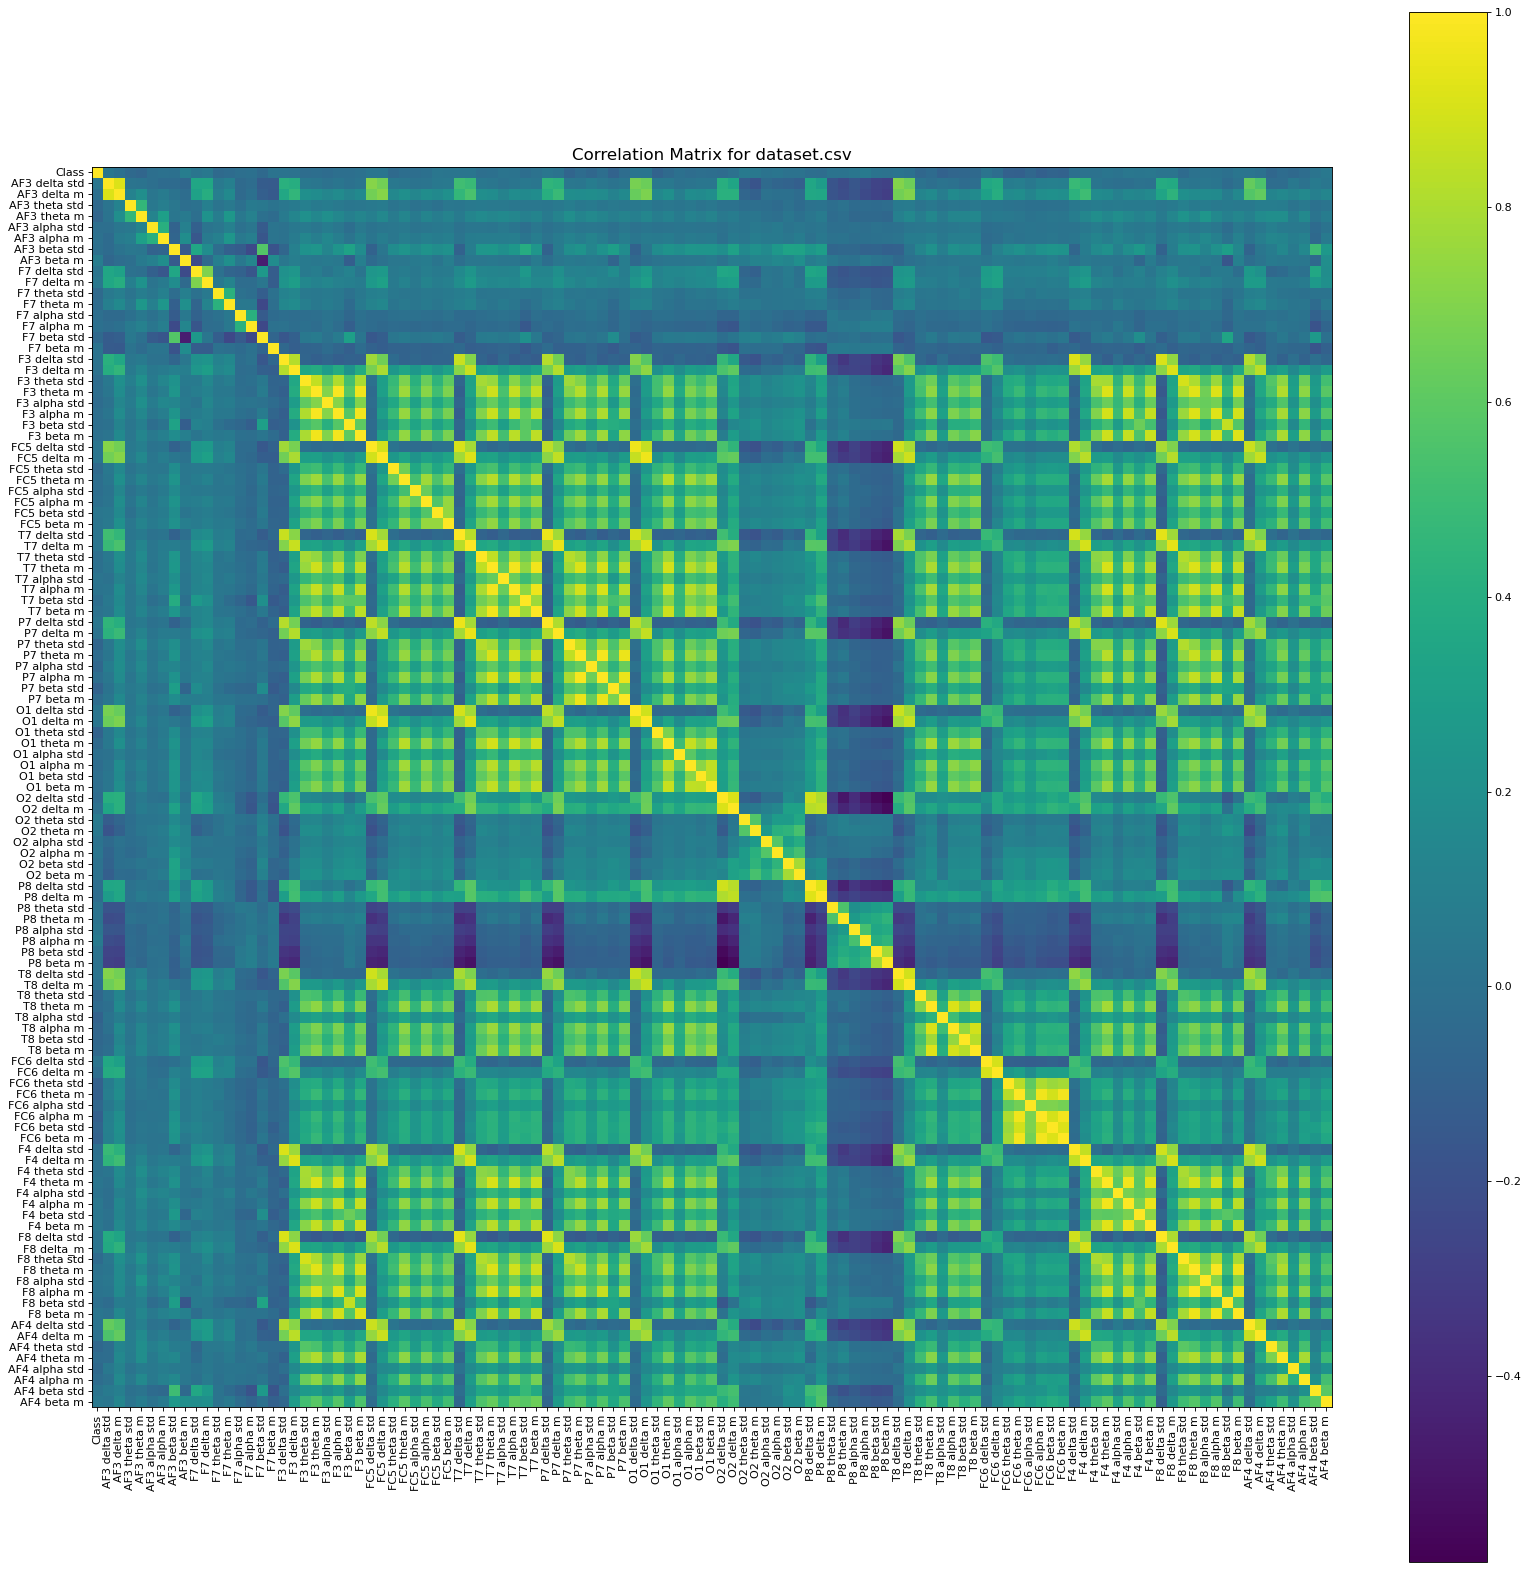

In [23]:
plotCorrelationMatrix(df3, 25)

C:\Users\Zonayed\AppData\Local\Temp\ipykernel_18572\950191735.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


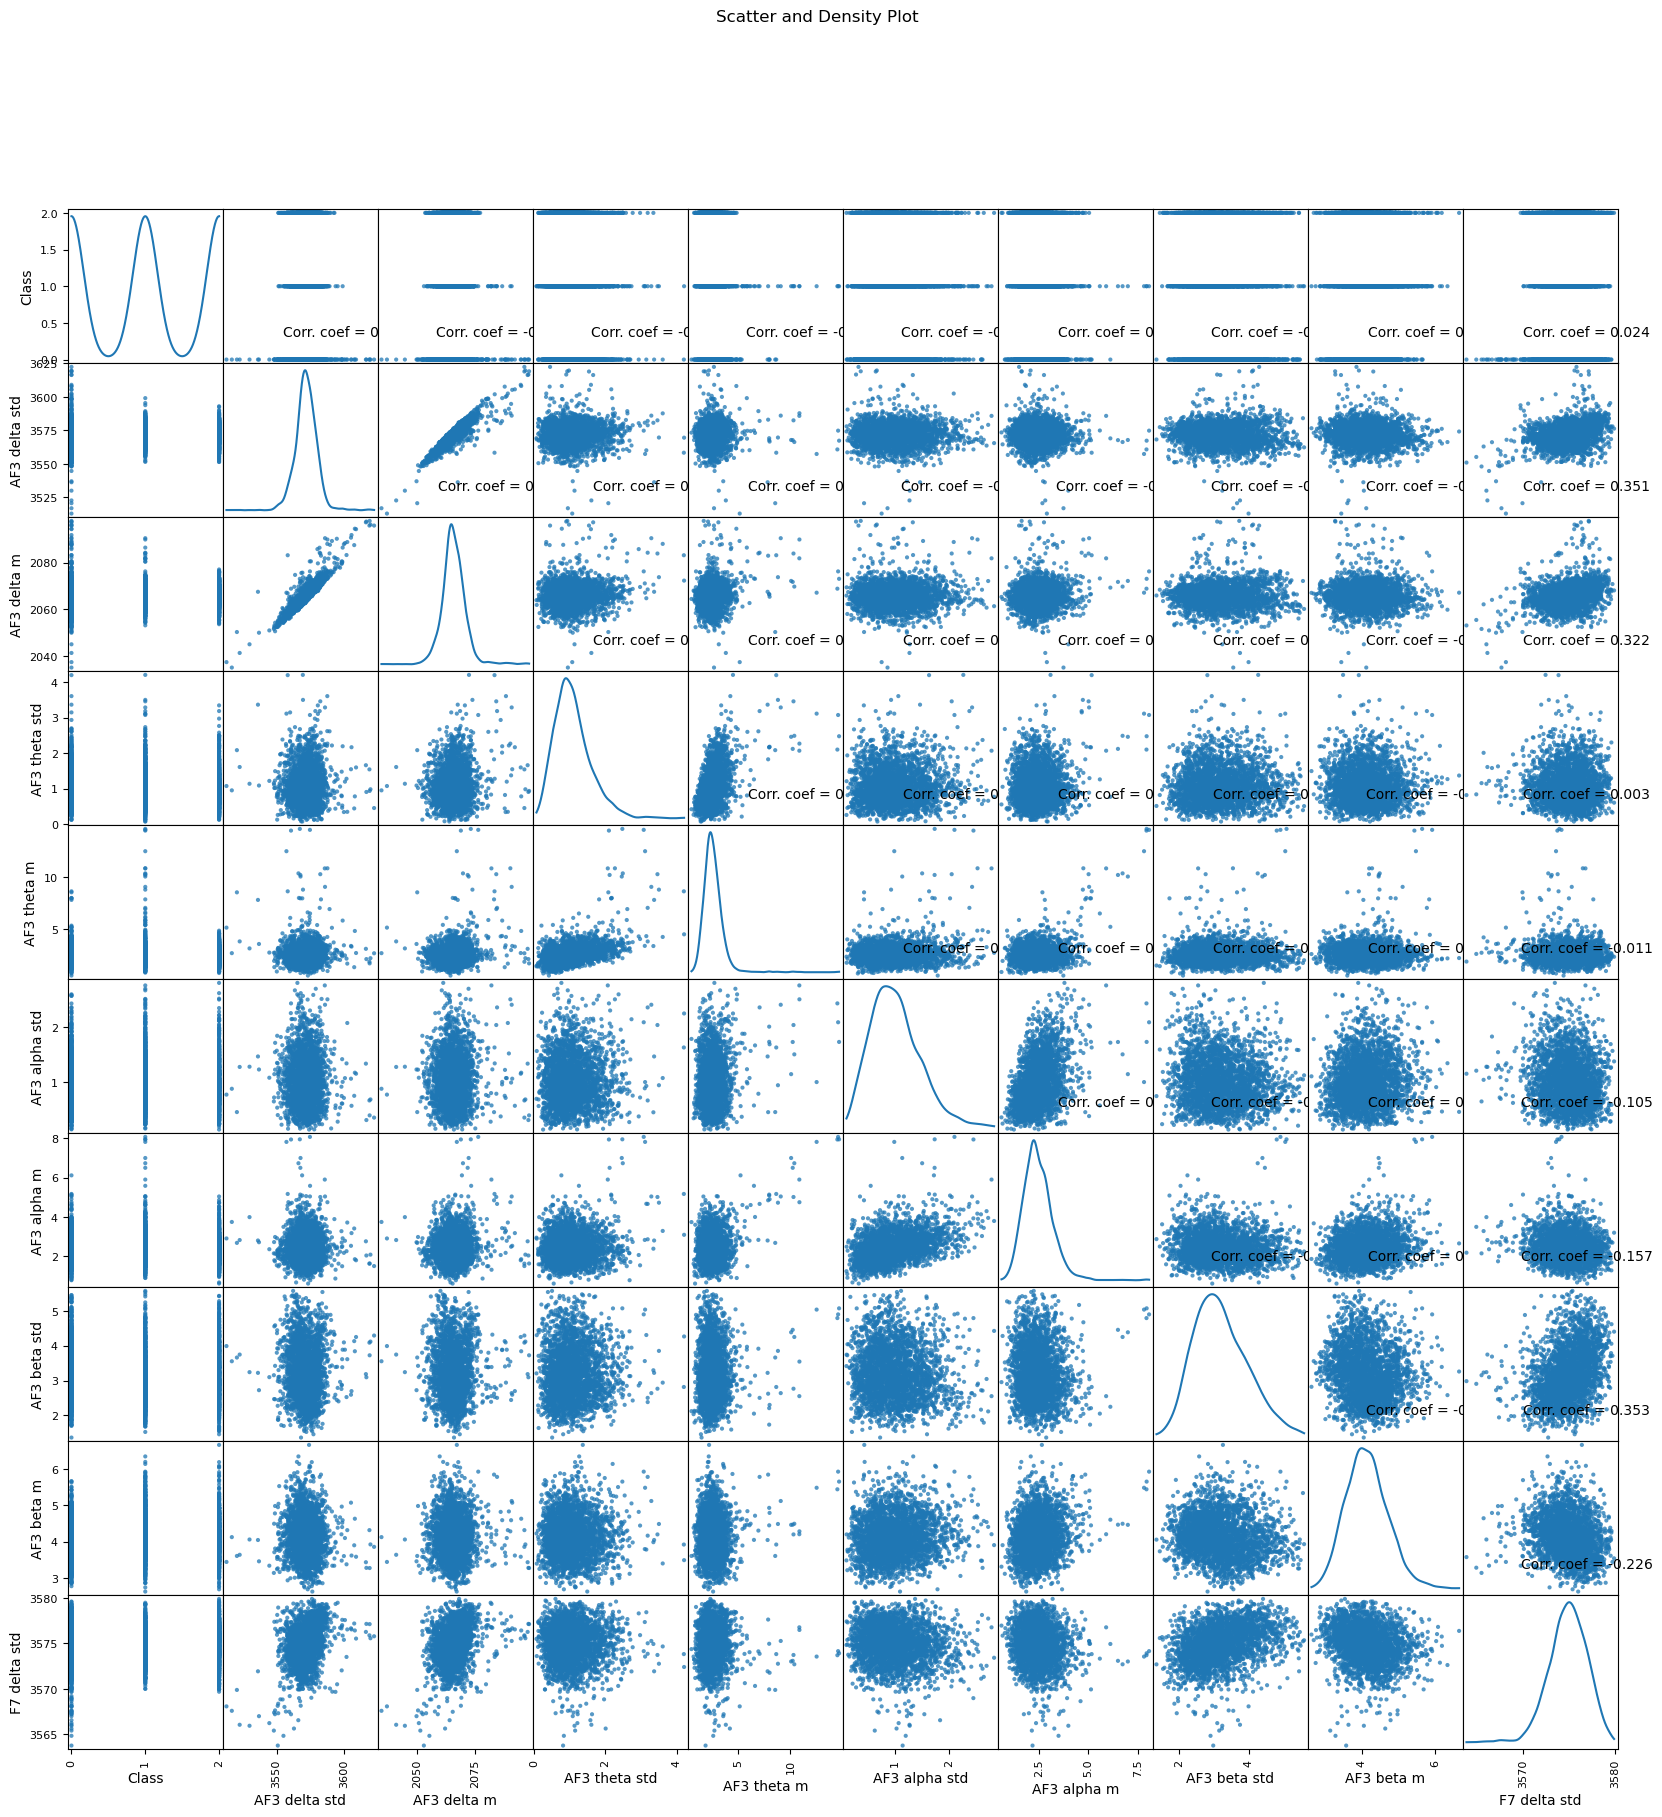

In [24]:
plotScatterMatrix(df3, 20, 10)

### User D

In [25]:
df4 = pd.read_csv('./Dataset/user_d.csv', delimiter=',')
df4.dataframeName = 'dataset.csv'
nRow, nCol = df4.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2880 rows and 113 columns


In [26]:
df4.head(5)

Class  AF3 delta std  AF3 delta m  AF3 theta std  AF3 theta m  \
0    1.0    3566.375438  2062.665095       1.040973     2.574824   
1    1.0    3565.986713  2061.826341       1.347088     2.154989   
2    1.0    3566.977885  2062.639807       1.083747     2.186981   
3    1.0    3566.342634  2063.069909       1.208843     2.160716   
4    1.0    3567.798629  2062.549327       1.378424     3.255706   

   AF3 alpha std  AF3 alpha m  AF3 beta std  AF3 beta m  F7 delta std  ...  \
0       1.376404     1.657806      0.933377    2.429998   3564.653552  ...   
1       0.904145     2.603965      1.175508    2.292886   3564.071577  ...   
2       1.155864     2.293261      1.144330    2.107225   3564.207493  ...   
3       1.143995     2.283394      1.008707    2.047132   3564.536023  ...   
4       0.795261     1.726990      0.914162    1.746653   3565.157175  ...   

   F8 beta std  F8 beta m  AF4 delta std  AF4 delta m  AF4 theta std  \
0     0.991871   1.800747    3564.807696  2061.398768       1.839022   
1     0.852802   1.620589    3565.004893  2061.989687       1.314281   
2     1.075723   1.422287    3567.117563  2061.465328       1.628649   
3     0.696173   1.416980    3565.482402  2060.885464       1.049679   
4     0.743514   1.384104    3566.585859  2061.257282       1.500156   

   AF4 theta m  AF4 alpha std  AF4 alpha m  AF4 beta std  AF4 beta m  
0     2.917284       1.095649     1.342387      1.141837    1.820216  
1     2.876174       1.178849     1.939520      0.903631    2.145510  
2     2.286765       1.591144     1.949241      1.006042    2.228659  
3     2.486281       0.684482     2.173874      0.937085    2.165614  
4     3.115490       1.235855     2.453826      0.840093    2.126146  

[5 rows x 113 columns]

1.0 5


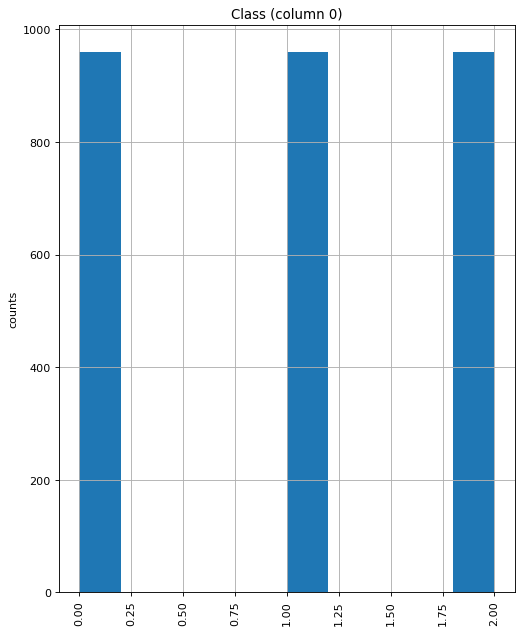

In [27]:
plotPerColumnDistribution(df4, 10, 5)

C:\Users\Zonayed\AppData\Local\Temp\ipykernel_18572\128494285.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


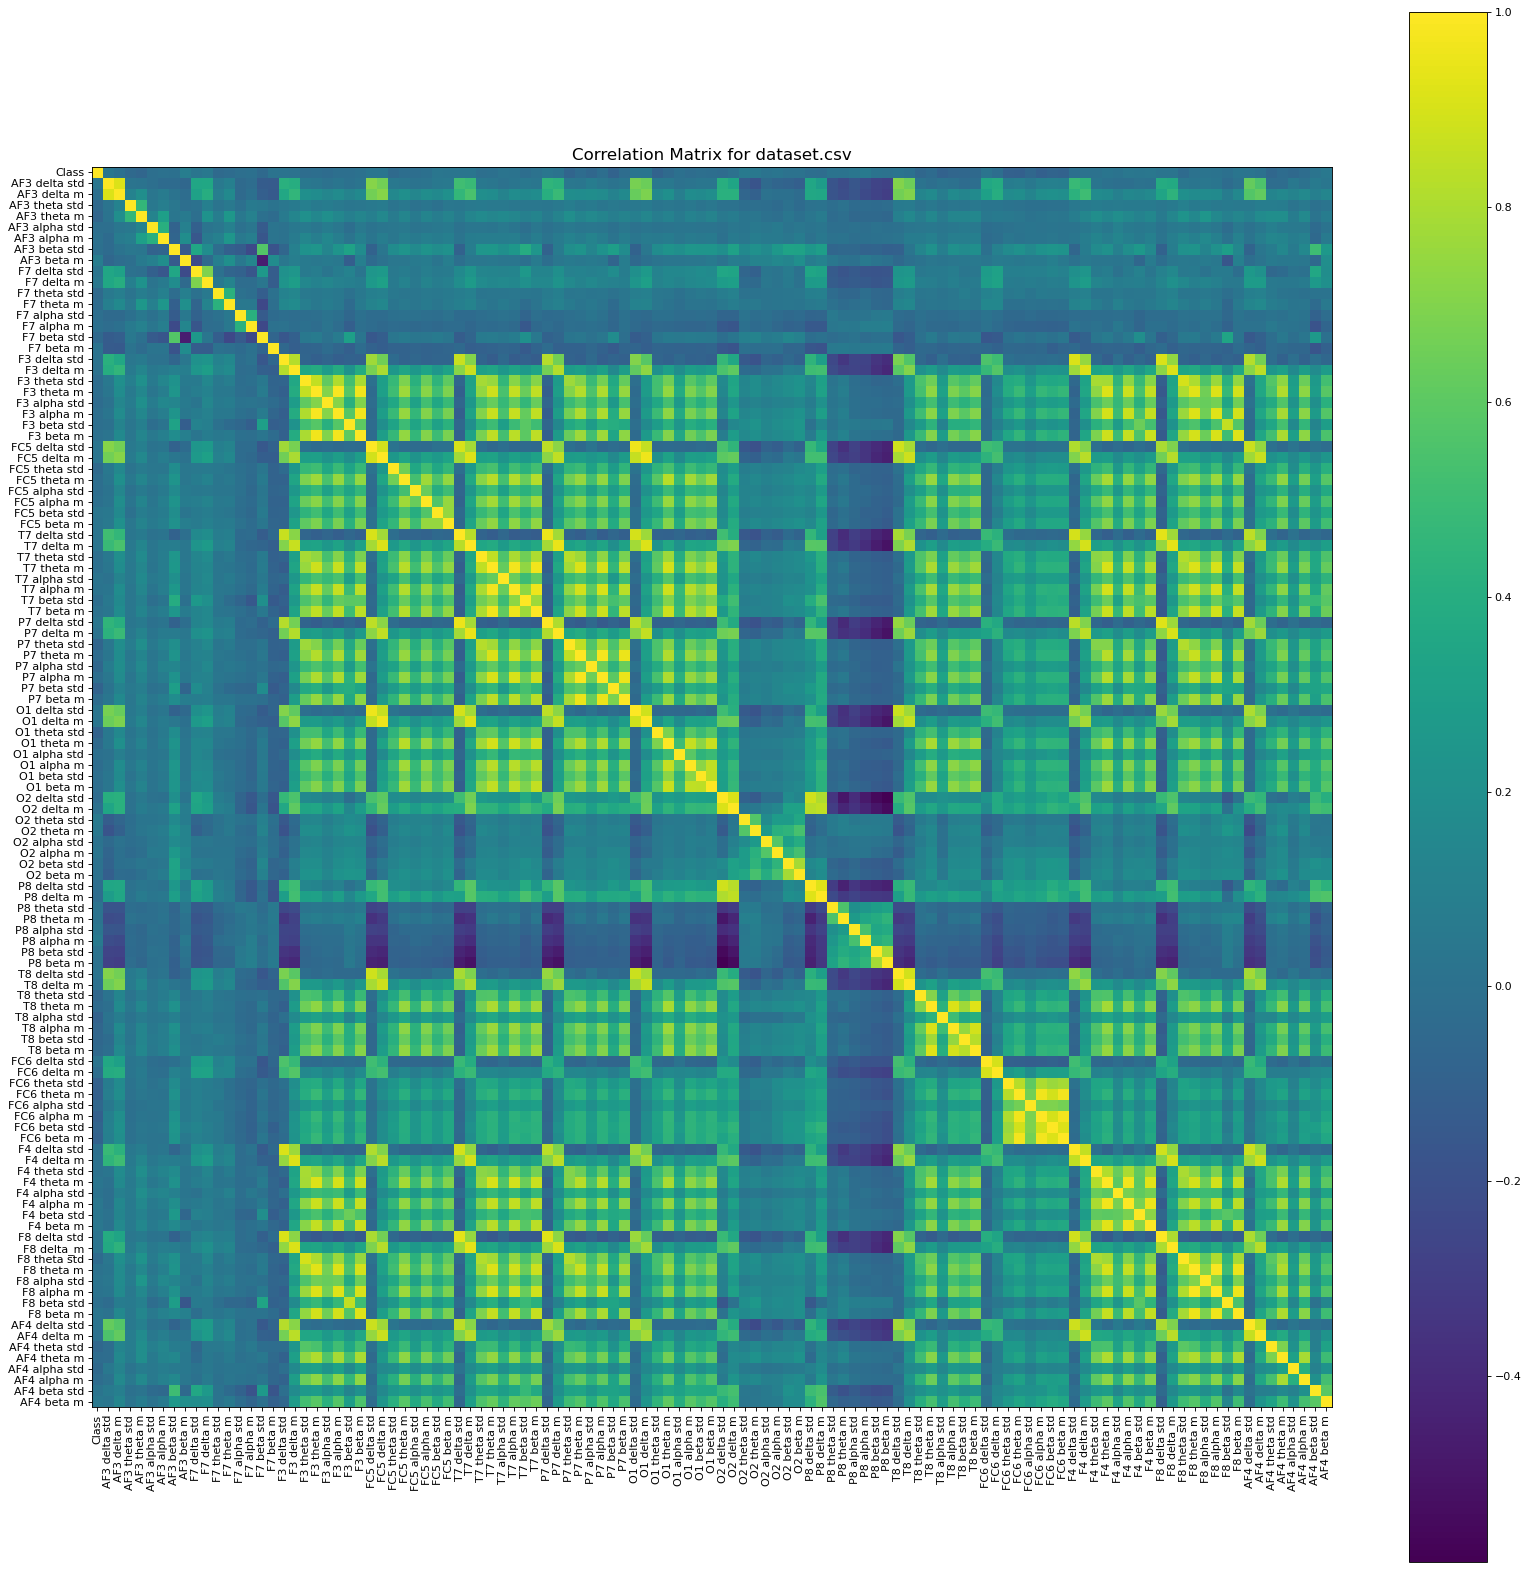

In [28]:
plotCorrelationMatrix(df3, 25)

C:\Users\Zonayed\AppData\Local\Temp\ipykernel_18572\950191735.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


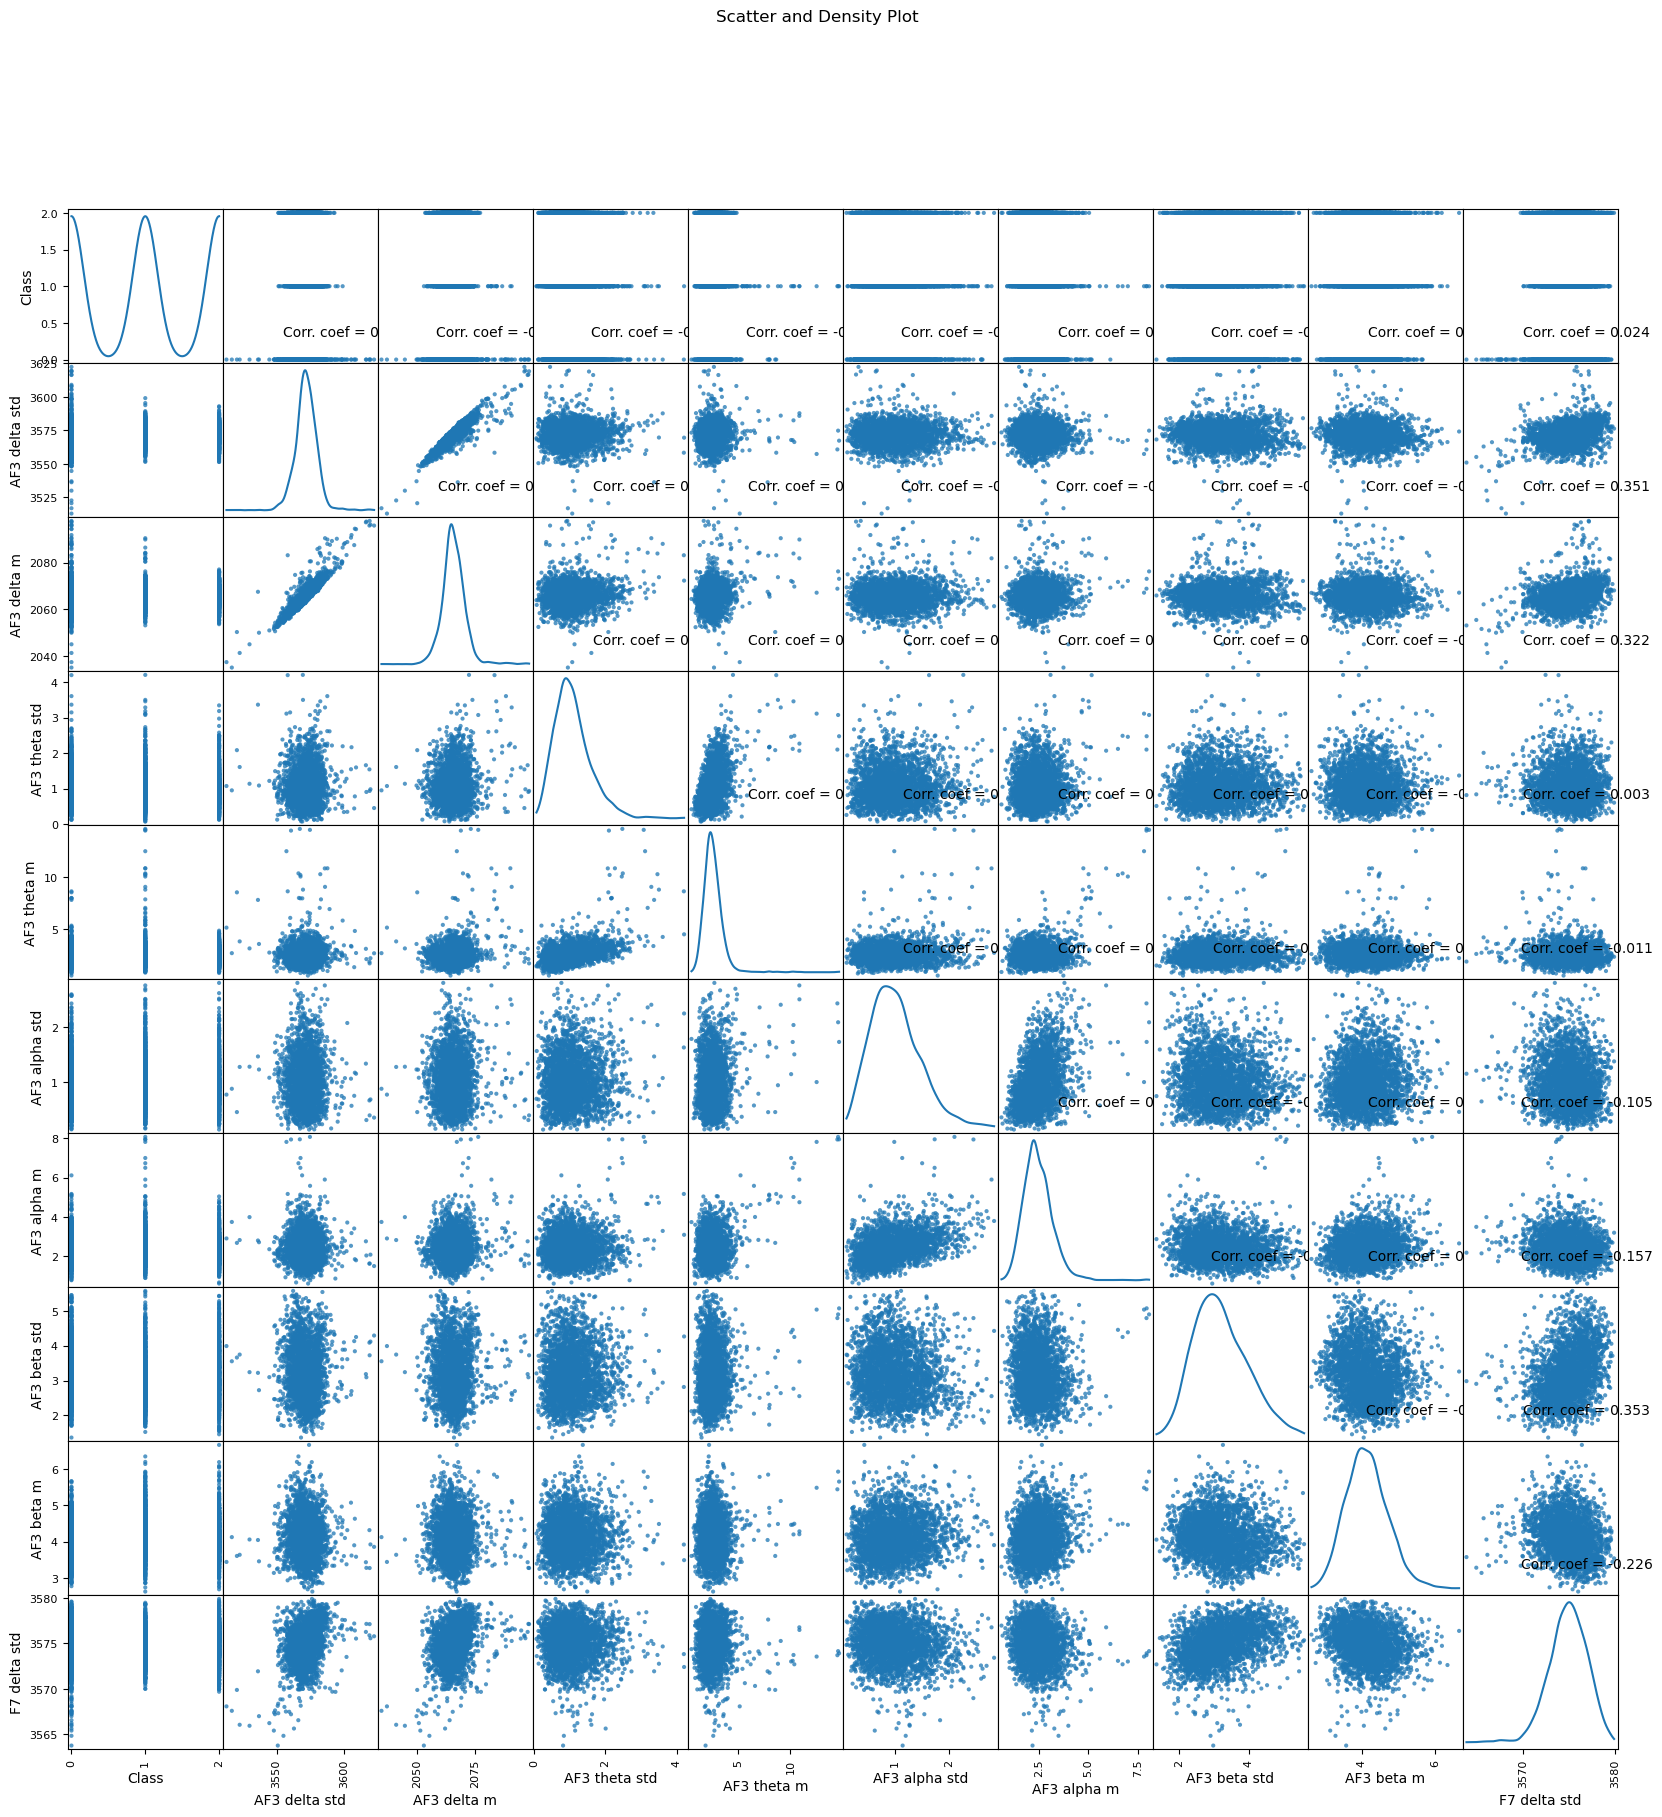

In [29]:
plotScatterMatrix(df3, 20, 10)

## Conclusion
This concludes your starter analysis!